# Abstract

On 25 April 2015, Nepal was struck by a devastating earthquake which took away countless lives and caused widespread building collapse. In the aftermath, Nepal's Central Bureau of Statistics collected data on the level of damage across Nepal. Our team has built a "Earthquake Damage Estimator" based on the above-mentioned dataset. Our aim is to:

1) Identify at-risk buildings in Nepal so that Nepalese authorities would know which buildings to reconstruct or reinforce against future earthquakes, given their limited resources.\
2) Identify characteristics of earthquake-resilient buildings which can be incorporated into future building constructions.

We will be creating 2 models for this project as follows:

### Model Major 

Damage Grade 3 (Major) vs NOT Damage Grade 3 : To identify which houses are most at risk and require urgent attention

### Model Minor

Damage Grade 1 (Minor) vs NOT Damage Grade 1 : To identify and investigate the types of houses which are earthquake resistant

# Data Extraction

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

eq_train = pd.read_csv('train_values.csv')
eq_labels = pd.read_csv('train_labels.csv')

In [2]:
#Response dataframe of damange grades
eq_train_damage = pd.DataFrame(eq_labels["damage_grade"])
#Dataframe of integer variables
eq_train_int = pd.DataFrame(eq_train[['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',\
                                      'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',\
                                      'count_families']])
#Dataframe of categorical variables (non-binary)
eq_train_cat = pd.DataFrame(eq_train[['building_id', 'land_surface_condition', 'foundation_type', 'roof_type',\
                                      'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration',\
                                      'legal_ownership_status']])
#Dataframe of categorical variables (binary)
eq_train_bin = pd.DataFrame(eq_train[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone',\
                                      'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',\
                                      'has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                                      'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',\
                                      'has_superstructure_rc_engineered','has_superstructure_other']])
#Second dataframe of categorical variables (binary)
eq_train_bin2 = pd.DataFrame(eq_train[['has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental',\
                                       'has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry',\
                                       'has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police',\
                                       'has_secondary_use_other']])


# Data Cleaning

Our team below will be cleaning and/or sorting our dataset in the following succesive order:\
1) Response Data\
2) Numeric Data\
3) Categorical Data (Non-Binary)\
4) Categorical Data (Binary)

We will not be further cleaning our numerical data since they are analyzable in their current form.


### Response Variable

In [3]:
#2 Different Response Variables for our 2 separate models
dmg1_eq_train_damage = eq_train_damage.copy()
dmg3_eq_train_damage = eq_train_damage.copy()

#Organising response data into: "Damage Grade 1" vs "NOT Damage Grade 1"
dmg1_conditions = {1:True, 2:False, 3:False}
dmg1_eq_train_damage = dmg1_eq_train_damage.replace(dmg1_conditions)
#Damage Grade 1: True
#Damage Grade 2 or 3: False

#Organising response data into: "Damage Grade 3" vs "NOT Damage Grade 3"
dmg3_conditions = {1:False, 2:False, 3:True}
dmg3_eq_train_damage = dmg3_eq_train_damage.replace(dmg3_conditions)
#Damage Grade 3: True
#Damage Grade 1 or 2: False

#df = pd.concat([df, eq_train_damage], axis=1, sort=False) -->if need to merge df

### Numeric Variable 

In [4]:
#Individual numeric variables dataframe
eq_train_geo1 = pd.DataFrame(eq_train_int['geo_level_1_id'])
eq_train_geo2 = pd.DataFrame(eq_train_int['geo_level_2_id'])
eq_train_geo3 = pd.DataFrame(eq_train_int['geo_level_3_id'])
eq_train_floorcount = pd.DataFrame(eq_train_int['count_floors_pre_eq'])
eq_train_age = pd.DataFrame(eq_train_int['age'])
eq_train_area_percent = pd.DataFrame(eq_train_int['area_percentage'])
eq_train_height_percent = pd.DataFrame(eq_train_int['height_percentage'])
eq_train_familiescount = pd.DataFrame(eq_train_int['count_families'])

### Categorical Variables (Non-Binary) 

In [5]:
#Under each variable for 'Land Surface Condition','Foundation Type','Roof Type','Ground Floor Type','Other Floor Type'
#'Position' and 'Plan Configuration', there are diffrent result types for each variable.
#We are going to create individual columns for each result type and convert into binary results.
#I.E. True: Result Type Present for the Building, False: Result Type Absent for the Building

eq_train_cat_bin = pd.get_dummies(eq_train_cat)
boolean_dict = {1:True, 0:False} #convert binary into boolean
eq_train_cat_bin = eq_train_cat_bin.replace(boolean_dict)

#Create individual dataframes for respective variables:

#Land Surface Type
eq_train_land = pd.DataFrame(eq_train_cat_bin[["land_surface_condition_n","land_surface_condition_o","land_surface_condition_t"]])

#Foundation Type
eq_train_found = pd.DataFrame(eq_train_cat_bin[["foundation_type_h","foundation_type_i","foundation_type_r",
                                                "foundation_type_u","foundation_type_w"]])
#Roof Type
eq_train_roof = pd.DataFrame(eq_train_cat_bin[["roof_type_n","roof_type_q","roof_type_x"]])

#Ground Floor Type
eq_train_Gr = pd.DataFrame(eq_train_cat_bin[["ground_floor_type_f","ground_floor_type_m","ground_floor_type_v",
                                    "ground_floor_type_x","ground_floor_type_z"]])
#Other Floor Type
eq_train_other = pd.DataFrame(eq_train_cat_bin[["other_floor_type_j","other_floor_type_q","other_floor_type_s","other_floor_type_x"]])

#Position
eq_train_position = pd.DataFrame(eq_train_cat_bin[["position_j","position_o","position_s","position_t"]])

#Plan Configuration
eq_train_plan = pd.DataFrame(eq_train_cat_bin[["plan_configuration_a","plan_configuration_c","plan_configuration_d",
                                             "plan_configuration_f","plan_configuration_m","plan_configuration_n",
                                             "plan_configuration_o","plan_configuration_q","plan_configuration_s",
                                             "plan_configuration_u"]])
#Legal Ownership Status
eq_train_legal = pd.DataFrame(eq_train_cat_bin[["legal_ownership_status_a","legal_ownership_status_r","legal_ownership_status_v",
                                           "legal_ownership_status_w"]])

### Categorical Variables (Binary) 

In [6]:
#As individual columns have already been made for each result type for variables: 'Superstructure Material'
#and 'Secondary Use', we will just convert them into binary form.

#Shorten column header
house_material_list = list(eq_train_bin.columns.values) #list of all 11 superstructure material
house_material_list = [index.replace('has_superstructure_','') for index in house_material_list]
eq_train_bin.columns = house_material_list

secondary_use_list = list(eq_train_bin2.columns.values) #list of all 10 superstructure material
secondary_use_list = [index.replace('has_secondary_use_','') for index in secondary_use_list]
eq_train_bin2.columns = secondary_use_list

#Create individual dataframes for respective variables:

boolean_dict = {1:True, 0:False} #convert binary into boolean
#Superstructure Material
eq_train_super_mat = eq_train_bin.replace(boolean_dict)
#Secondary Use
eq_train_sec_use = eq_train_bin2.replace(boolean_dict)

# Exploratory Analysis

Due to the many variables present in this dataset, there is a need to segregate out the important variables that are effective in classifying our dataset. Hence, we will be using uni-variate trees to do so. \
\
Our chosen metric to evaluate and select suitable variables will be the "Gini Coefficient". We will be looking at the degree of decrease in Gini (i.e. Degree of Increase in Classification Confidence) and the range of Gini values obtained for each variable. Ideally, we want a range of Gini values that are significantly lowered.\
\
Note: Since the datasets given have already been split into train and test sets, we will not be splitting our datasets. Furthermore, we have excluded "Geo Level" since we are looking at the characteristics of the construction of hte buildings. Geographic characteristics have already been factored by categorical variables like "Land Condition Type". We have also excluded "Families Count", "Legal Ownership Status" and "Secondary Use" as we do not feel they have any physical effect on damage grade or lives lost.

## Numeric Data

### Floors Count

In [7]:
from sklearn.tree import DecisionTreeClassifier

#Predictors (X)
eq_train_prefloors = pd.DataFrame(eq_train_int["count_floors_pre_eq"])

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

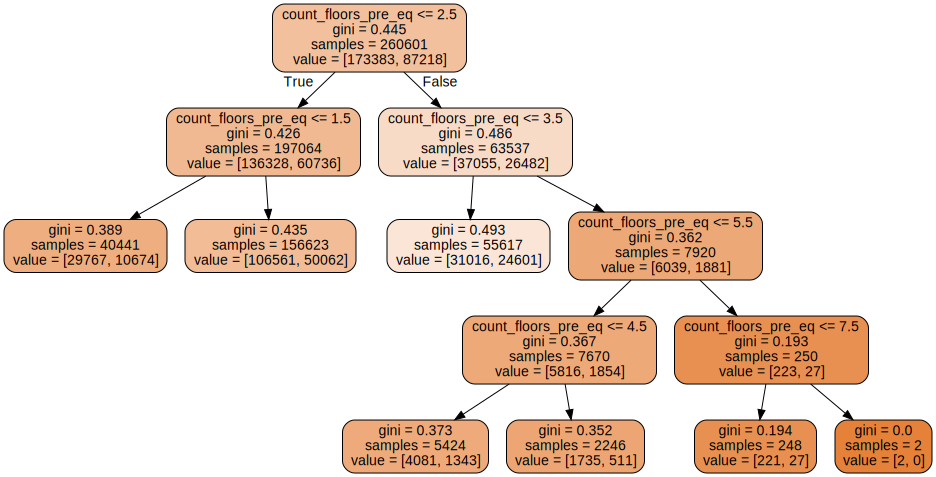

In [8]:
#Model Major Tree (Floors)
floors_major_tree = DecisionTreeClassifier(max_depth = 4)  
floors_major_tree.fit(eq_train_prefloors, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
floors_major_treedot = export_graphviz(floors_major_tree,                                      # the model
                          feature_names = eq_train_prefloors.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(floors_major_treedot)

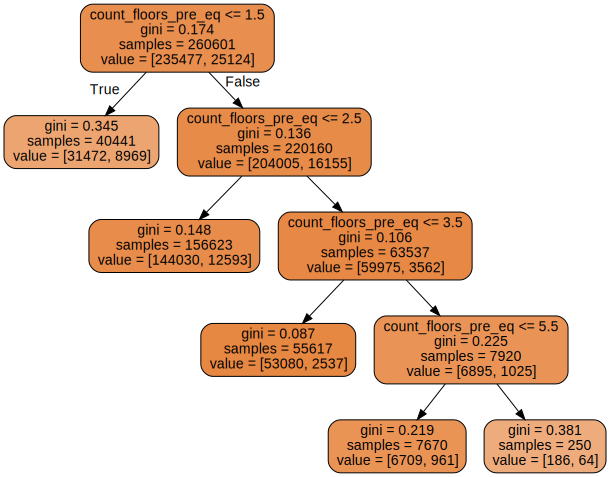

In [9]:
#Model Minor Tree (Floors)
floors_minor_tree = DecisionTreeClassifier(max_depth = 4)  
floors_minor_tree.fit(eq_train_prefloors, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
floors_minor_treedot = export_graphviz(floors_minor_tree,                                      # the model
                          feature_names = eq_train_prefloors.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(floors_minor_treedot)

### Age of Building

In [10]:
#Predictors (X)
eq_train_age = pd.DataFrame(eq_train_int["age"])

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

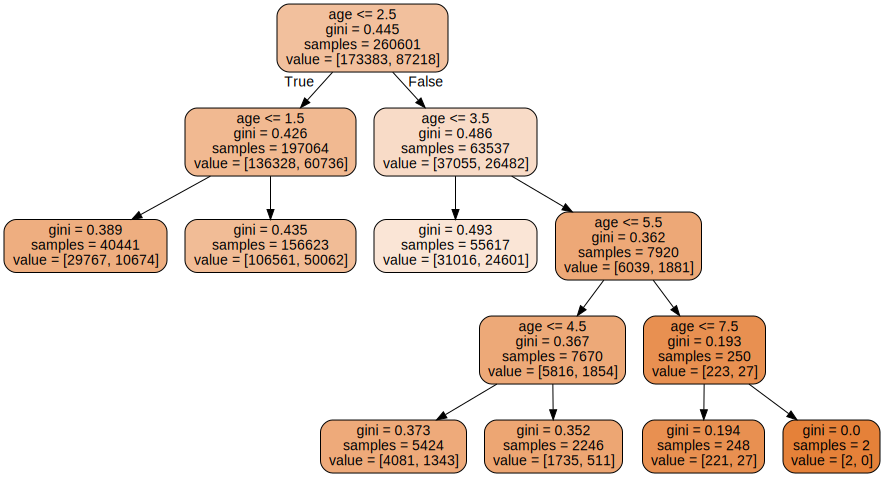

In [11]:
#Model Major Tree (Age)
age_major_tree = DecisionTreeClassifier(max_depth = 4)  
age_major_tree.fit(eq_train_prefloors, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
age_major_treedot = export_graphviz(age_major_tree,                                      # the model
                          feature_names = eq_train_age.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(age_major_treedot)

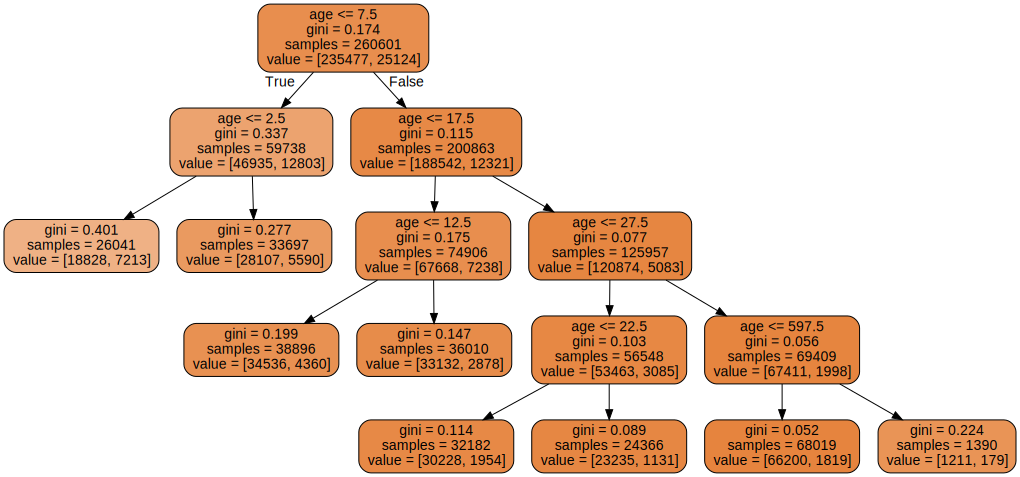

In [12]:
#Model Minor Tree (Age)
age_minor_tree = DecisionTreeClassifier(max_depth = 4)  
age_minor_tree.fit(eq_train_age, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
age_minor_treedot = export_graphviz(age_minor_tree,                                      # the model
                          feature_names = eq_train_age.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(age_minor_treedot)

### Area Percentage

In [13]:
#Predictors (X)
eq_train_area = pd.DataFrame(eq_train_int["area_percentage"])

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

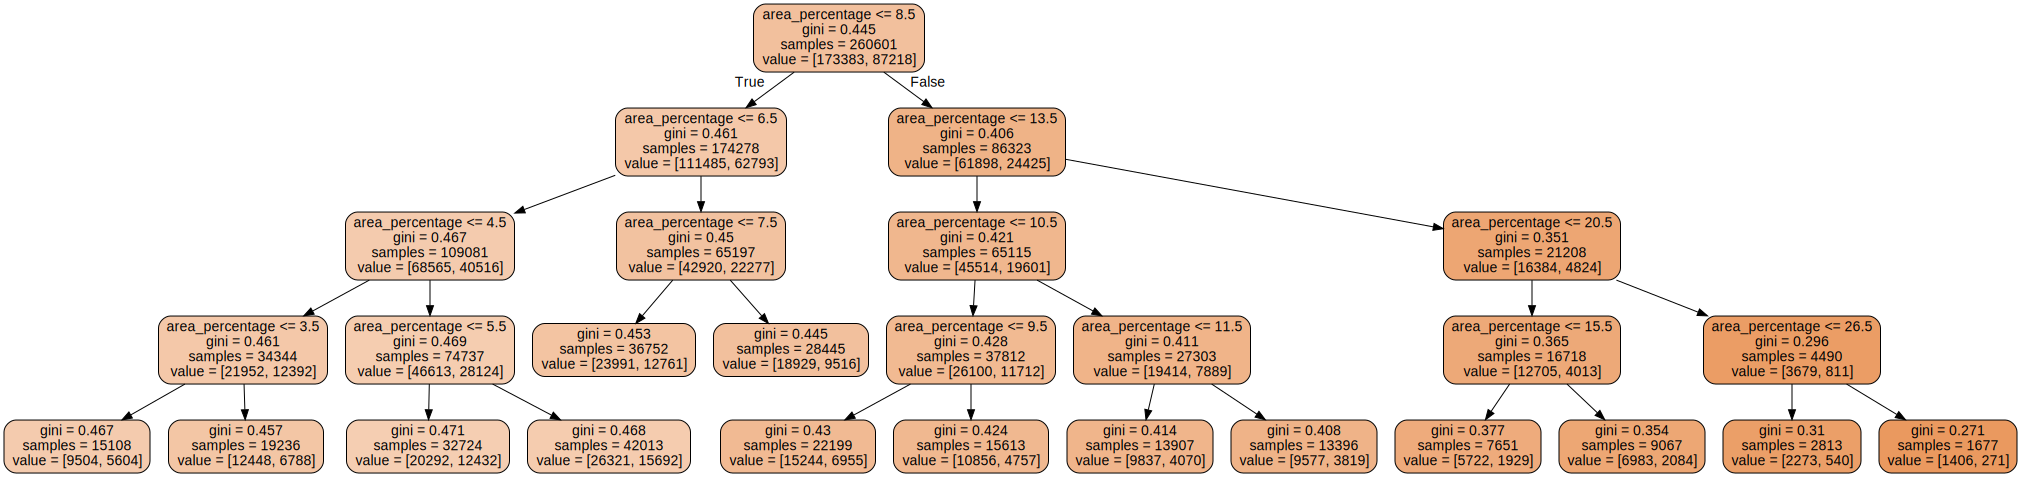

In [14]:
#Model Major Tree (Area Percentage)
area_major_tree = DecisionTreeClassifier(max_depth = 4)  
area_major_tree.fit(eq_train_area, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
area_major_treedot = export_graphviz(area_major_tree,                                      # the model
                          feature_names = eq_train_area.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(area_major_treedot)

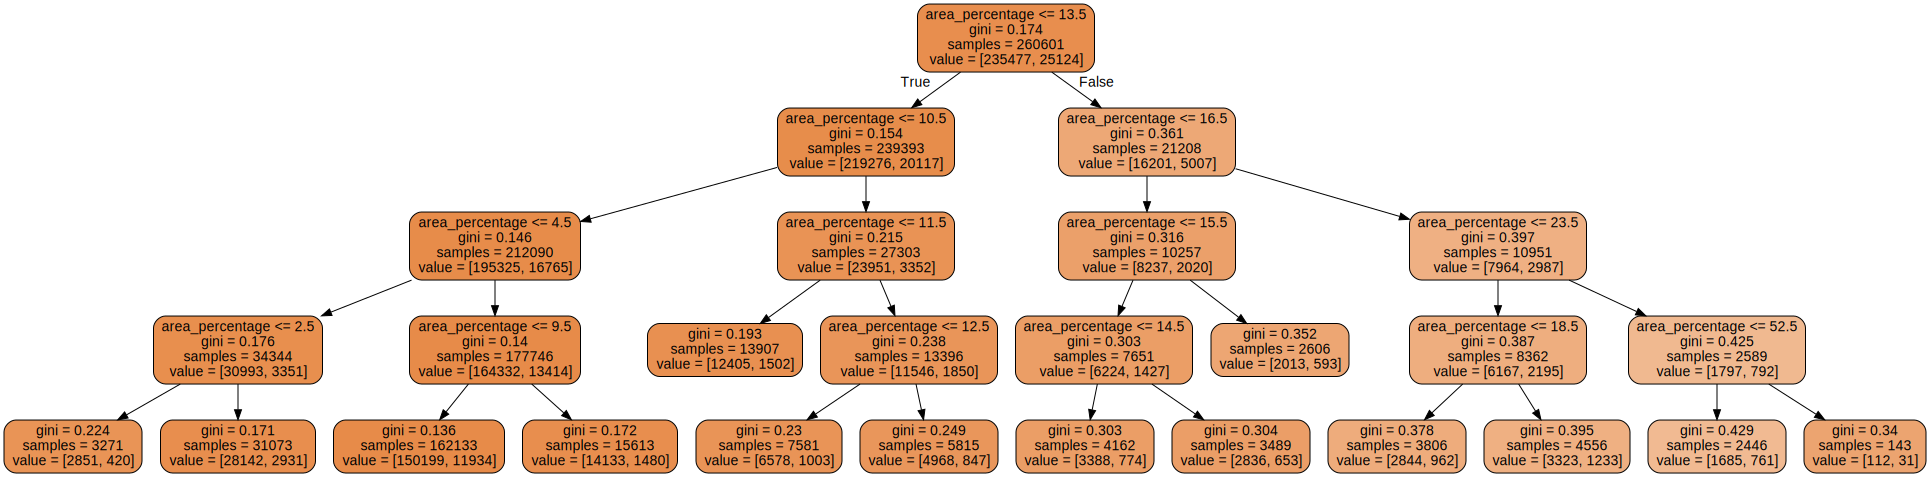

In [15]:
#Model Minor Tree (Age)
area_minor_tree = DecisionTreeClassifier(max_depth = 4)  
area_minor_tree.fit(eq_train_area, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
area_minor_treedot = export_graphviz(area_minor_tree,                                      # the model
                          feature_names = eq_train_area.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(area_minor_treedot)

### Height Percentage

In [16]:
#Predictors (X)
eq_train_height = pd.DataFrame(eq_train_int["height_percentage"])

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

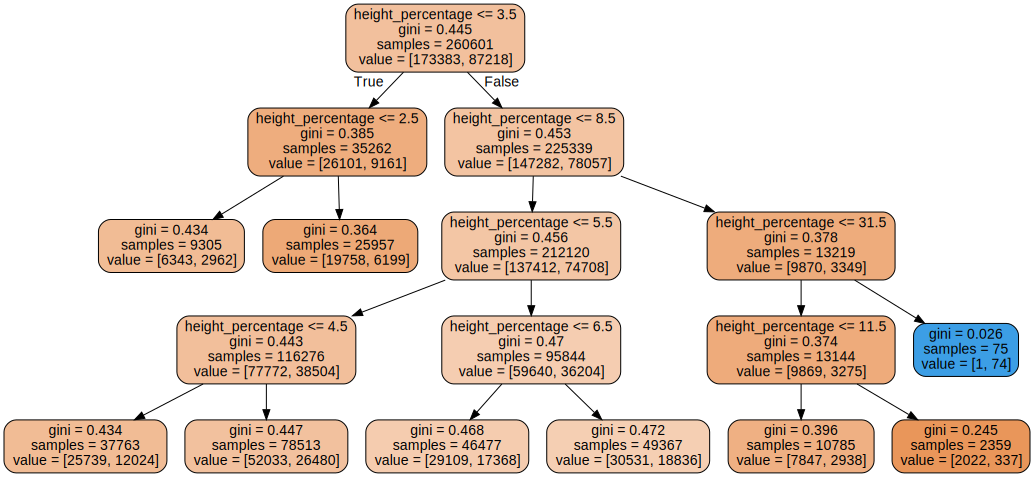

In [17]:
#Model Major Tree (Height)
height_major_tree = DecisionTreeClassifier(max_depth = 4)  
height_major_tree.fit(eq_train_height, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
height_major_treedot = export_graphviz(height_major_tree,                                      # the model
                          feature_names = eq_train_height.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(height_major_treedot)

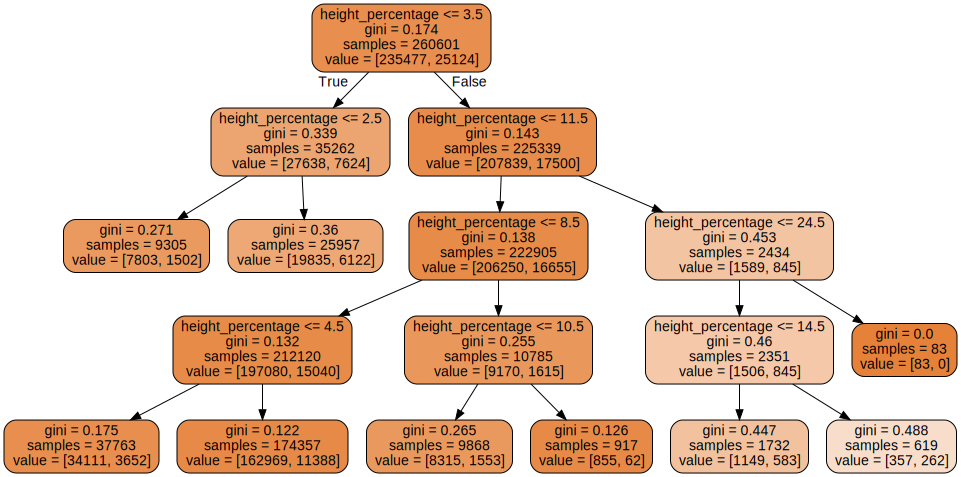

In [18]:
#Model Minor Tree (Height)
height_minor_tree = DecisionTreeClassifier(max_depth = 4)  
height_minor_tree.fit(eq_train_height, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
height_minor_treedot = export_graphviz(height_minor_tree,                                      # the model
                          feature_names = eq_train_height.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(height_minor_treedot)

## Categorical Data

### Land Surface Condition

In [19]:
#Predictors (X)
eq_train_land = pd.DataFrame(eq_train_cat_bin[["land_surface_condition_n","land_surface_condition_o","land_surface_condition_t"]])

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

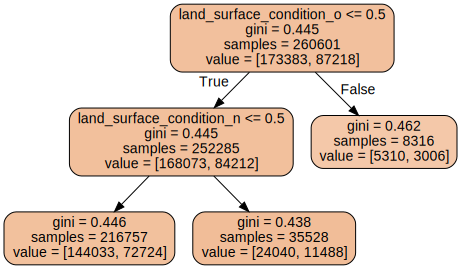

In [20]:
#Model Major Tree (Land Surface)
land_major_tree = DecisionTreeClassifier(max_depth = 4)  
land_major_tree.fit(eq_train_land, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
land_major_treedot = export_graphviz(land_major_tree,                                      # the model
                          feature_names = eq_train_land.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(land_major_treedot)

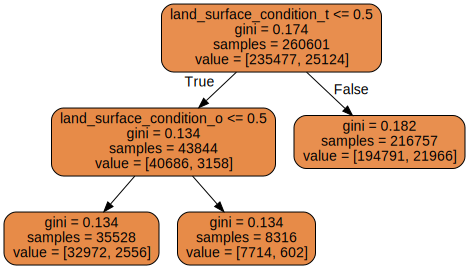

In [21]:
#Model Minor Tree (Land Surface)
land_minor_tree = DecisionTreeClassifier(max_depth = 4)  
land_minor_tree.fit(eq_train_land, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
land_minor_treedot = export_graphviz(land_minor_tree,                    # the model
                          feature_names = eq_train_land.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(land_minor_treedot)

### Foundation Type

In [22]:
#Predictors (X)
eq_train_found = pd.DataFrame(eq_train_cat_bin[["foundation_type_h","foundation_type_i","foundation_type_r",
                                                "foundation_type_u","foundation_type_w"]])
#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

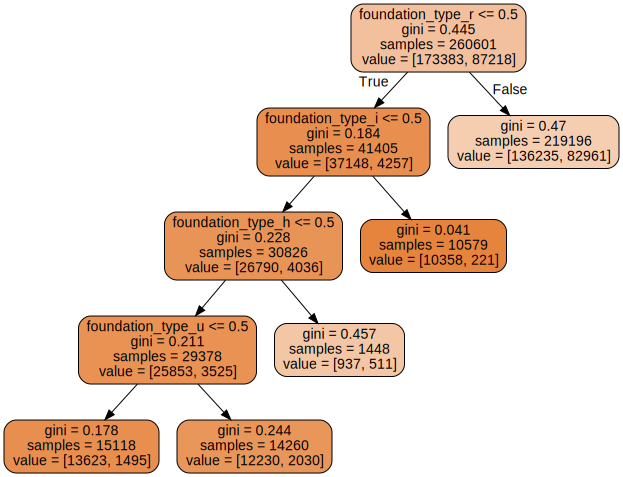

In [23]:
#Model Major Tree (Foundation Type)
found_major_tree = DecisionTreeClassifier(max_depth = 4)  
found_major_tree.fit(eq_train_found, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
found_major_treedot = export_graphviz(found_major_tree,                                      # the model
                          feature_names = eq_train_found.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(found_major_treedot)

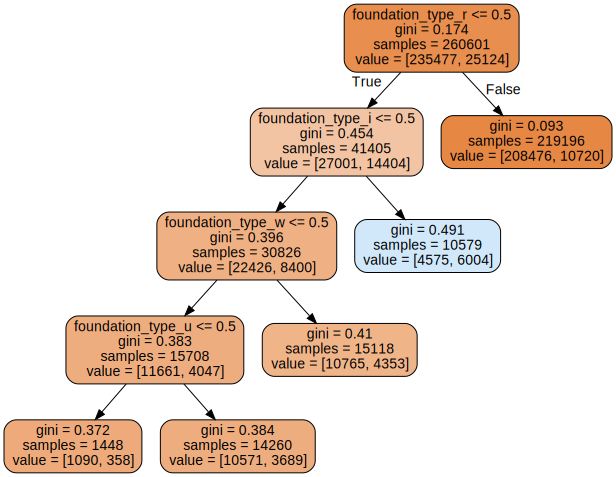

In [24]:
#Model Minor Tree (Foundation Type)
found_minor_tree = DecisionTreeClassifier(max_depth = 4)  
found_minor_tree.fit(eq_train_found, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
found_minor_treedot = export_graphviz(found_minor_tree,                    # the model
                          feature_names = eq_train_found.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(found_minor_treedot)

### Roof Type

In [25]:
#Predictors (X)
eq_train_roof = pd.DataFrame(eq_train_cat_bin[["roof_type_n","roof_type_q","roof_type_x"]])

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

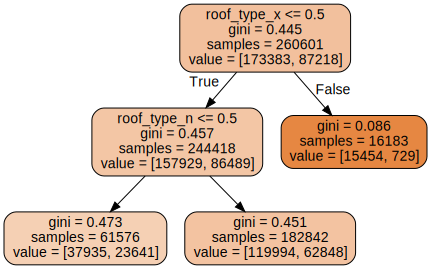

In [26]:
#Model Major Tree (Roof Type)
roof_major_tree = DecisionTreeClassifier(max_depth = 4)  
roof_major_tree.fit(eq_train_roof, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
roof_major_treedot = export_graphviz(roof_major_tree,                                      # the model
                          feature_names = eq_train_roof.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(roof_major_treedot)

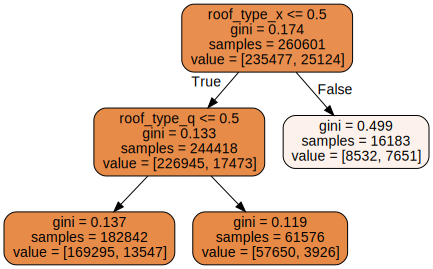

In [27]:
#Model Minor Tree (Roof Type)
roof_minor_tree = DecisionTreeClassifier(max_depth = 4)  
roof_minor_tree.fit(eq_train_roof, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
roof_minor_treedot = export_graphviz(roof_minor_tree,                    # the model
                          feature_names = eq_train_roof.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(roof_minor_treedot)

### Ground Floor Type

In [28]:
#Predictors (X)
eq_train_Gr = pd.DataFrame(eq_train_cat_bin[["ground_floor_type_f","ground_floor_type_m","ground_floor_type_v",
                                    "ground_floor_type_x","ground_floor_type_z"]])
#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

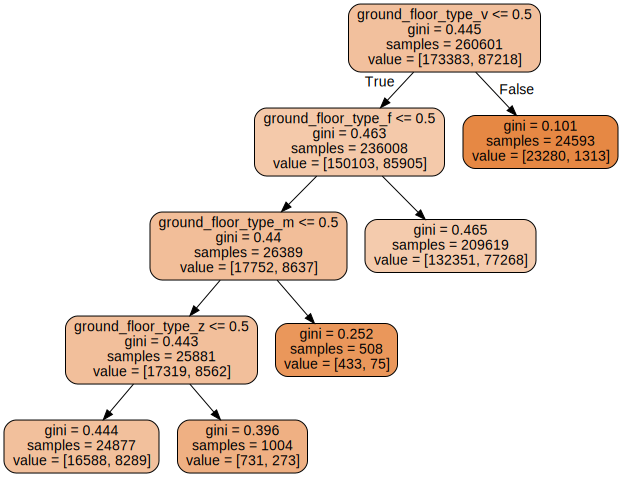

In [29]:
#Model Major Tree (Ground Floor Type)
Gr_major_tree = DecisionTreeClassifier(max_depth = 4)  
Gr_major_tree.fit(eq_train_Gr, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
Gr_major_treedot = export_graphviz(Gr_major_tree,                                      # the model
                          feature_names = eq_train_Gr.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(Gr_major_treedot)

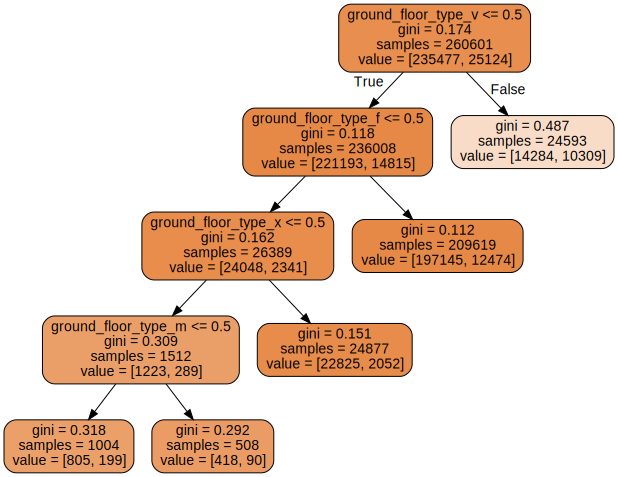

In [30]:
#Model Minor Tree (Ground Floor Type)
Gr_minor_tree = DecisionTreeClassifier(max_depth = 4)  
Gr_minor_tree.fit(eq_train_Gr, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
Gr_minor_treedot = export_graphviz(Gr_minor_tree,                    # the model
                          feature_names = eq_train_Gr.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(Gr_minor_treedot)

### Other Floor Type

In [31]:
#Predictors (X)
eq_train_other = pd.DataFrame(eq_train_cat_bin[["other_floor_type_j","other_floor_type_q","other_floor_type_s","other_floor_type_x"]])

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

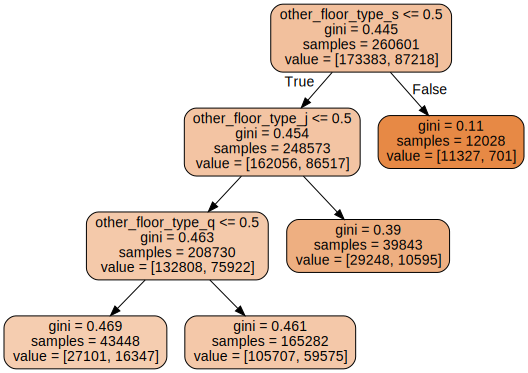

In [32]:
#Model Major Tree (Other Floor Type)
other_major_tree = DecisionTreeClassifier(max_depth = 4)  
other_major_tree.fit(eq_train_other, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
other_major_treedot = export_graphviz(other_major_tree,                                      # the model
                          feature_names = eq_train_other.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(other_major_treedot)

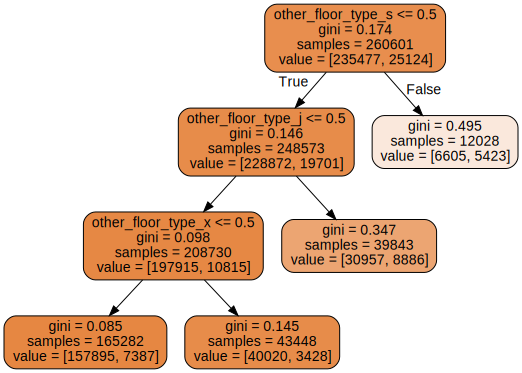

In [33]:
#Model Minor Tree (Other Floor Type)
other_minor_tree = DecisionTreeClassifier(max_depth = 4)  
other_minor_tree.fit(eq_train_other, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
other_minor_treedot = export_graphviz(other_minor_tree,                    # the model
                          feature_names = eq_train_other.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(other_minor_treedot)

### Position

In [34]:
#Predictors (X)
eq_train_position = pd.DataFrame(eq_train_cat_bin[["position_j","position_o","position_s","position_t"]])

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

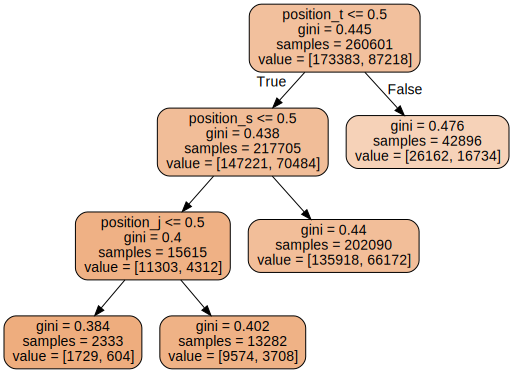

In [35]:
#Model Major Tree (Position)
position_major_tree = DecisionTreeClassifier(max_depth = 4)  
position_major_tree.fit(eq_train_position, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
position_major_treedot = export_graphviz(position_major_tree,                                      # the model
                          feature_names = eq_train_position.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(position_major_treedot)

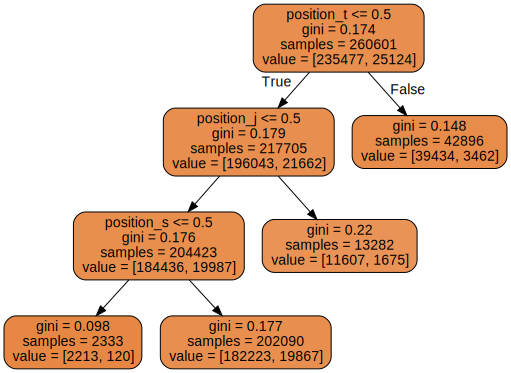

In [36]:
#Model Minor Tree (Position)
position_minor_tree = DecisionTreeClassifier(max_depth = 4)  
position_minor_tree.fit(eq_train_position, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
position_minor_treedot = export_graphviz(position_minor_tree,                    # the model
                          feature_names = eq_train_position.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(position_minor_treedot)

### Plan Configuration

In [37]:
#Predictors (X)
eq_train_plan = pd.DataFrame(eq_train_cat_bin[["plan_configuration_a","plan_configuration_c","plan_configuration_d",
                                             "plan_configuration_f","plan_configuration_m","plan_configuration_n",
                                             "plan_configuration_o","plan_configuration_q","plan_configuration_s",
                                             "plan_configuration_u"]])
#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

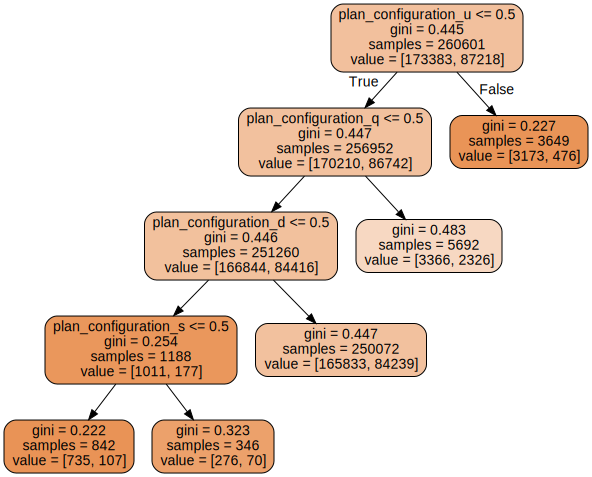

In [38]:
#Model Major Tree (Plan Configuration)
plan_major_tree = DecisionTreeClassifier(max_depth = 4)  
plan_major_tree.fit(eq_train_plan, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
plan_major_treedot = export_graphviz(plan_major_tree,                                      # the model
                          feature_names = eq_train_plan.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(plan_major_treedot)

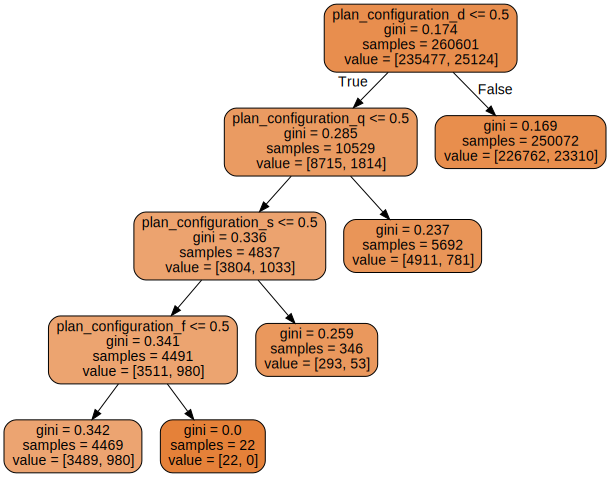

In [39]:
#Model Minor Tree (Plan Configuration)
plan_minor_tree = DecisionTreeClassifier(max_depth = 4)  
plan_minor_tree.fit(eq_train_plan, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
plan_minor_treedot = export_graphviz(plan_minor_tree,                    # the model
                          feature_names = eq_train_plan.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(plan_minor_treedot)

## Binary Data

### Superstructure

In [40]:
#Predictors (X)
eq_train_super = eq_train_super_mat.copy()

#Response (Y)
eq_train_response_major = dmg3_eq_train_damage #Model Major
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

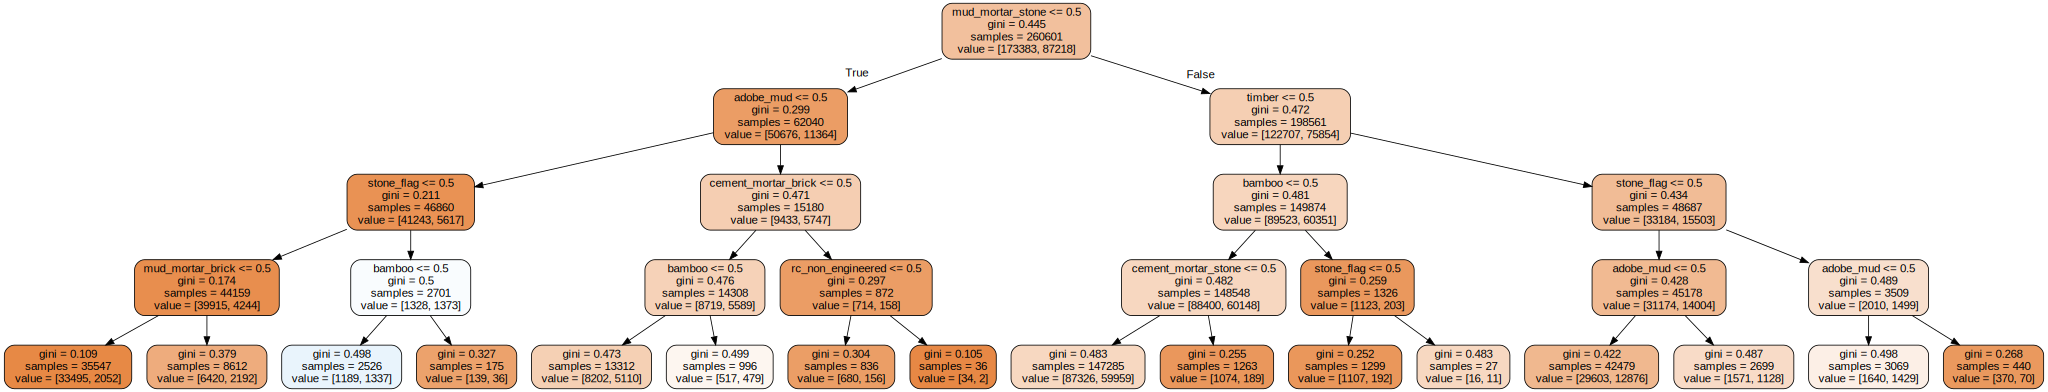

In [41]:
#Model Major Tree (Superstructure)
super_major_tree = DecisionTreeClassifier(max_depth = 4)  
super_major_tree.fit(eq_train_super, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
super_major_treedot = export_graphviz(super_major_tree,                                      # the model
                          feature_names = eq_train_super.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(super_major_treedot)

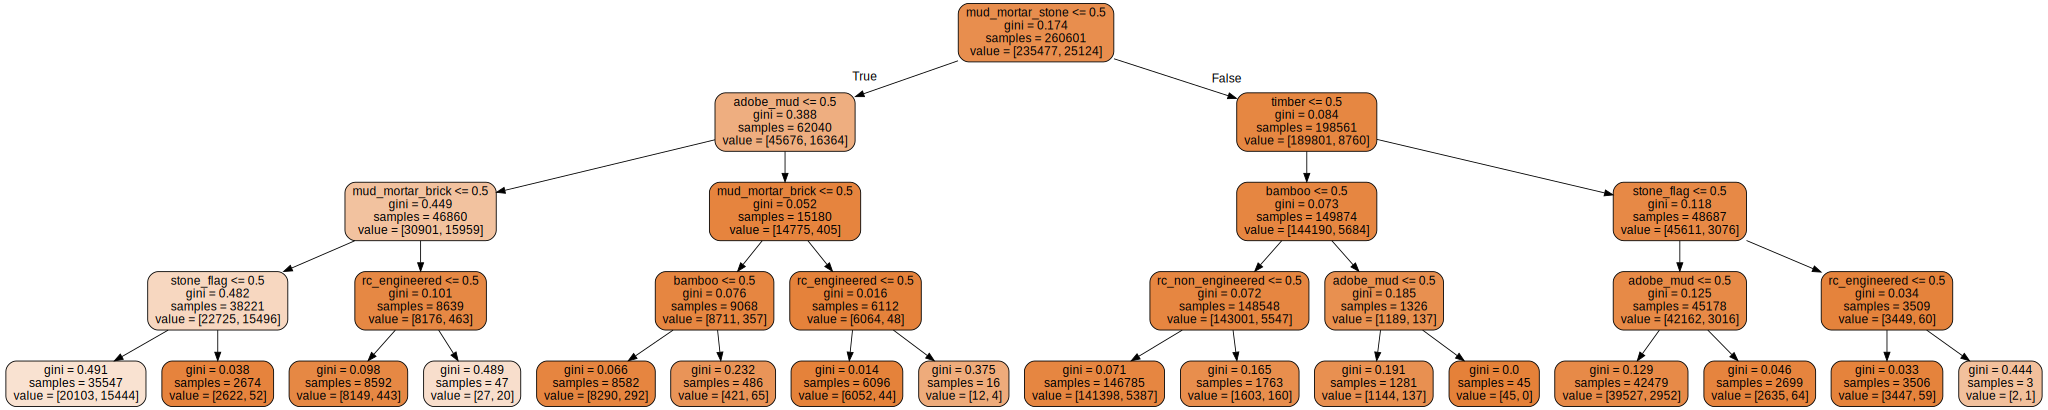

In [42]:
#Model Minor Tree (Superstructure)
super_minor_tree = DecisionTreeClassifier(max_depth = 4)  
super_minor_tree.fit(eq_train_super, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
super_minor_treedot = export_graphviz(super_minor_tree,                    # the model
                          feature_names = eq_train_super.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)  

import graphviz
graphviz.Source(super_minor_treedot)

# Findings: Range of Gini Values
### Model Major:
#### Integer:
    Floors Count: 0.0 – 0.435 
    Age of Building: 0.0 – 0.435
    Area Percentage: 0.271 – 0.468
    Height Percentage: 0.245 – 0.472
#### Categorical:
    Land Surface Condition: 0.438 – 0.446
    Foundation Type: 0.041 – 0.244
    Roof Type: 0.451 - 0.473
    Ground Floor Type: 0.101 – 0.444
    Other Floor Type: 0.11 – 0.469
    Position: 0.384 – 0.476
    Plan Configuration: 0.222 – 0.483
#### Binary
    Superstructure: 0.109 – 0.499
### Model Minor:
##### Integer: 
    Floors Count: 0.087 – 0.381
    Age of Building: 0.052 – 0.224
    Area Percentage: 0.136 – 0.429
    Height Percentage: 0.0 – 0.488
#### Categorical
    Land Surface Condition: 0.134
    Foundation Type: 0.041 – 0.47
    Roof Type: 0.119 – 0.137
    Ground Floor Type: 0.151 – 0.487
    Other Floor Type: 0.085 – 0.495
    Position: 0.098 – 0.22
    Plan Configuration: 0.0 – 0.342
#### Binary
    Superstructure: 0.0 – 0.491

# Findings Analysis
From general observations, we notice that majority of the variables resulted in improvements in Classification Confidence as observed by the range of low Gini Coefficient values obtained. For our 2 separate models, we note that the level of improvement differed greatly for some variables. As such, the ideal variables chosen for Model Major and Model Minor would differ slightly.\
\
Another observation is that some variables were able to classify with maximum confidence (i.e. Gini Coefficient = 0). However, our team realised that due to the extremely skewed "Damage Grade" data we have (See Figure below), selection of these variable for our model led to an extremely high bias towards "False" results. Initially, we chose all maximum confidence variables. However, our models consistently predicted all results as "False", with only 2 possible results:\
\
1) True Negative\
2) False Negative\
\
As such, we revised our selection to prioritise variables that showed improvements in Classification Confidence but not extreme confidence levels.
### Model Major
1) Area Percentage\
2) Height Percentage\
3) Foundation Type\
4) Ground Floor Type\
5) Other Floor Type\
6) Plan Configuration\
7) Superstructure
### Model Minor
1) Floor Count\
2) Age of Building\
3) Land Surface Condition\
4) Ground Floor Type\
5) Superstructure

# Training the Model

## Model Major
Damage Grade 3 vs NOT Damage Grade 3

In [43]:
#Response
eq_train_major_num_var = pd.DataFrame(eq_train_int[['height_percentage', 'area_percentage']])
eq_train_major_cat_var = pd.DataFrame(eq_train_cat_bin[["foundation_type_h","foundation_type_i","foundation_type_r",\
                                                        "foundation_type_u","foundation_type_w","ground_floor_type_f",\
                                                        "ground_floor_type_m","ground_floor_type_v","ground_floor_type_x",\
                                                        "ground_floor_type_z","other_floor_type_j","other_floor_type_q",\
                                                        "other_floor_type_s","other_floor_type_x","plan_configuration_a",\
                                                        "plan_configuration_c","plan_configuration_d","plan_configuration_f",\
                                                        "plan_configuration_m","plan_configuration_n","plan_configuration_o",\
                                                        "plan_configuration_q","plan_configuration_s","plan_configuration_u"]])
eq_train_major_bi_var = pd.DataFrame(eq_train_super_mat)
eq_train_combined_major = pd.concat([eq_train_major_num_var, eq_train_major_cat_var,eq_train_major_bi_var], 
                                  axis=1, sort =False)

#Predictors
eq_train_response_major = dmg3_eq_train_damage #Model Major

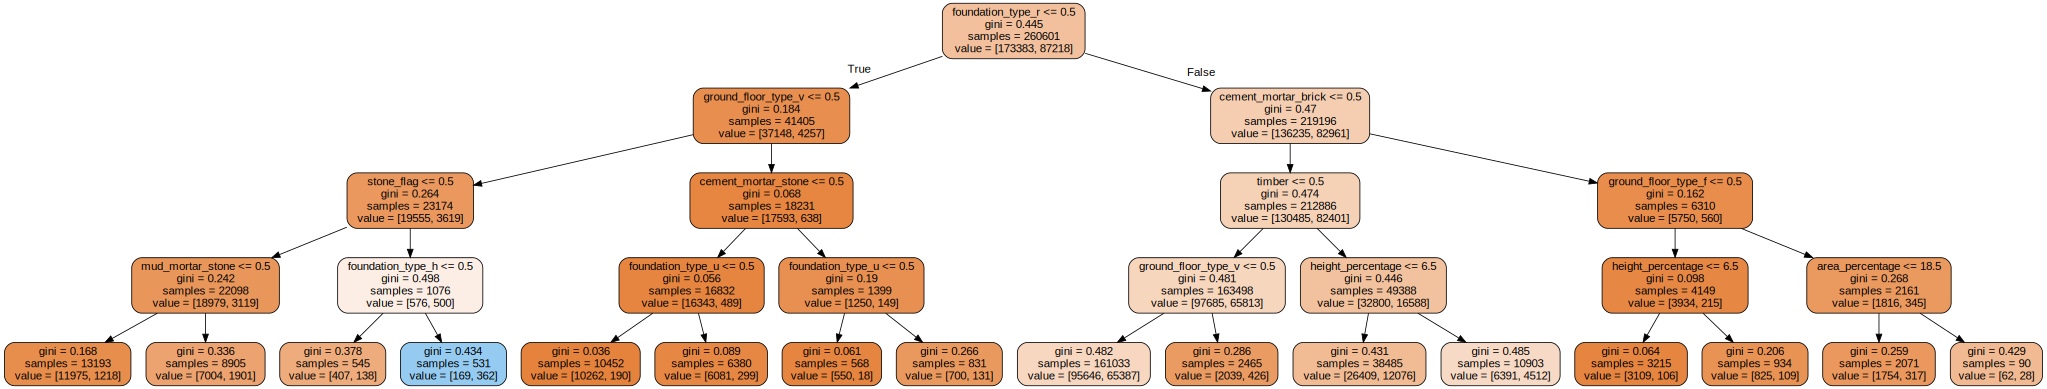

In [44]:
#Model Major Tree (Combined variables)
combined_major_tree = DecisionTreeClassifier(max_depth = 4)  
combined_major_tree.fit(eq_train_combined_major, eq_train_response_major)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
combined_major_treedot = export_graphviz(combined_major_tree,                                      # the model
                          feature_names = eq_train_combined_major.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False)                    # postscript

import graphviz
graphviz.Source(combined_major_treedot)

In [45]:
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn import tree

In [98]:
def plot_tree_major(crit, split, depth, min_split, min_leaf=10):
    estimator_major = DecisionTreeClassifier(random_state = 0 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator_major.fit(eq_train_combined_major, eq_train_response_major)
    
    graph = Source(tree.export_graphviz(estimator_major
      , out_file=None
      , feature_names=eq_train_combined_major.columns
      , class_names=['no major damage', 'major damage']
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    
    return estimator_major

In [100]:
inter_major=interactive(plot_tree_major, crit = ["gini","entropy"],\
                 split=["best","random"], depth=[1,2,3,4],\
                 min_split=(10,100),min_leaf=(10,100))
    
display(inter_major)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Model Minor
Damage Grade 1 (Minor) vs NOT Damage Grade 1

In [74]:
#Response
eq_train_minor_num_var = pd.DataFrame(eq_train_int[['count_floors_pre_eq', 'age']])
eq_train_minor_cat_var = pd.DataFrame(eq_train_cat_bin[["land_surface_condition_n","land_surface_condition_o","land_surface_condition_t", "ground_floor_type_f","ground_floor_type_m","ground_floor_type_v", "ground_floor_type_x","ground_floor_type_z"]])
eq_train_minor_bi_var = pd.DataFrame(eq_train_super_mat)
eq_train_combined_minor = pd.concat([eq_train_minor_num_var, eq_train_minor_cat_var,eq_train_minor_bi_var], 
                                  axis=1, sort =False)

#Predictors
eq_train_response_minor = dmg1_eq_train_damage #Model Minor

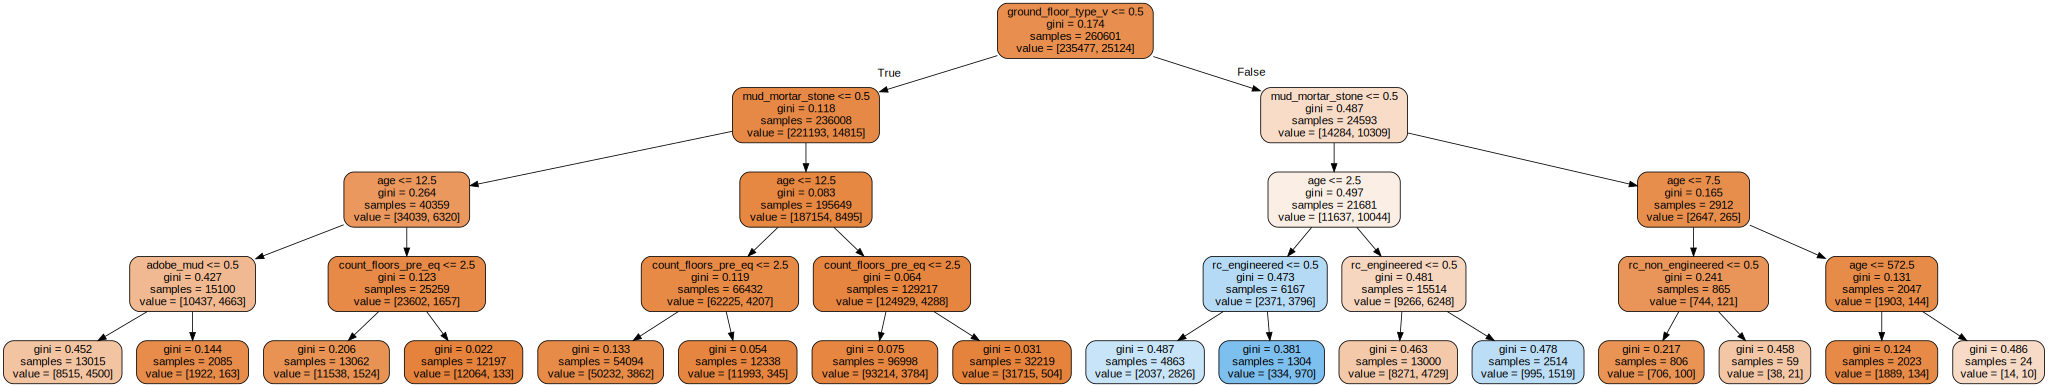

In [75]:
#Model Minor Tree (Combined variables)
combined_minor_tree = DecisionTreeClassifier(max_depth = 4)  
combined_minor_tree.fit(eq_train_combined_minor, eq_train_response_minor)

#Plot the Decision Tree
from sklearn.tree import export_graphviz
combined_minor_treedot = export_graphviz(combined_minor_tree,                    # the model
                          feature_names = eq_train_combined_minor.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = False) 

import graphviz
graphviz.Source(combined_minor_treedot)

In [101]:
def plot_tree_minor(crit, split, depth, min_split, min_leaf=10):
    estimator_minor = DecisionTreeClassifier(random_state = 0 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator_minor.fit(eq_train_combined_minor, eq_train_response_minor)
    
    graph = Source(tree.export_graphviz(estimator_minor
      , out_file=None
      , feature_names=eq_train_combined_minor.columns
      , class_names=['no minor damage', 'minor damage']
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    
    return estimator_minor

In [102]:
inter_minor=interactive(plot_tree_minor, crit = ["gini","entropy"],\
                 split=["best","random"], depth=[1,2,3,4],\
                 min_split=(10,100),min_leaf=(10,100))
    
display(inter_minor)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Comparison Between Predicted & Actual Results

In [78]:
#Using Model Major Tree to predict Major Damage (i.e Damage Grade 3)
major_prediction = combined_major_tree.predict(eq_train_combined_major) 
predicted_major_frame = pd.DataFrame(major_prediction, columns= ["Damage 3"])
predicted_major_frame

,Damage 3
0,False
1,False
2,False
3,False
4,False
...,...
260596,False
260597,False
260598,False
260599,False


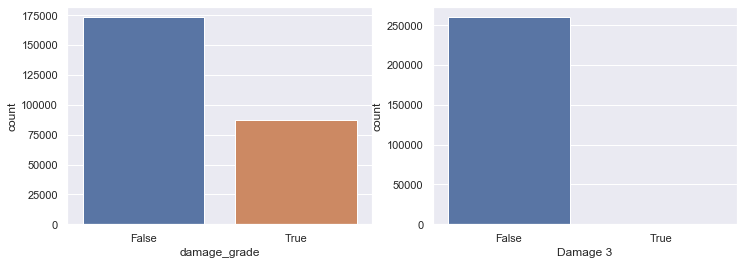

In [79]:
#Plot Actual (Left) against Predicted (Right) results for Major Damage
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.countplot(dmg3_eq_train_damage['damage_grade'], ax=axes[0]) #Actual results
sb.countplot(predicted_major_frame['Damage 3'],  ax=axes[1]) #Predicted results

In [80]:
actual_major = pd.DataFrame(dmg3_eq_train_damage['damage_grade'])
actual_major_noindex = actual_major.reset_index(drop = True)

test_major = pd.DataFrame(predicted_major_frame['Damage 3'])
test_major_noindex = test_major.reset_index(drop = True)

major_combined = pd.concat([actual_major_noindex, test_major_noindex], axis=1, sort=True)
major_combined_accuracy = major_combined.copy() 

In [81]:
# extract all rows for which actual is true and Prediction is true
Major_TP = major_combined_accuracy[(major_combined_accuracy["damage_grade"] == True) & (major_combined_accuracy['Damage 3'] == True) ]

# extract all rows for which actual is false and Prediction is false
Major_TN = major_combined_accuracy[(major_combined_accuracy["damage_grade"] == False) & (major_combined_accuracy['Damage 3'] == False) ]

In [82]:
count_major_TN = len(Major_TN.index)  #number of true negatives from model
count_major_TP = len(Major_TP.index)  #number of true positives from model
count_major_total = len(major_combined_accuracy.index)

In [83]:
major_classification_accuracy = (count_major_TN + count_major_TP) / count_major_total
print("classification accuracy of major model :",major_classification_accuracy)

classification accuracy of major model : 0.666060375823577


In [84]:
#Using Model Minor Tree to predict Minor Damage (i.e. Damage Grade 1)
minor_prediction = combined_minor_tree.predict(eq_train_combined_minor) 
predicted_minor_frame = pd.DataFrame(minor_prediction, columns= ["Damage 1"])
predicted_minor_frame

,Damage 1
0,False
1,False
2,False
3,False
4,False
...,...
260596,False
260597,False
260598,False
260599,False


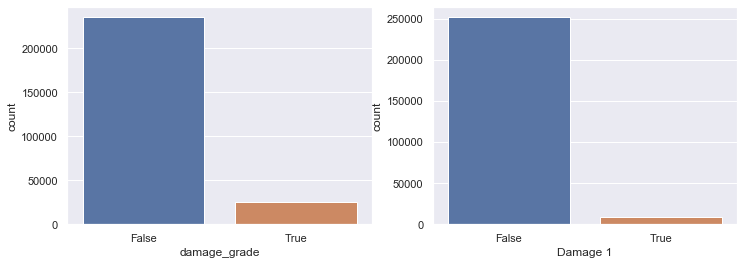

In [85]:
#Plot Actual (left) against Predicted (Right) results for Minor Damage
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.countplot(dmg1_eq_train_damage['damage_grade'],ax=axes[0]) #Actual results
sb.countplot(predicted_minor_frame['Damage 1'], ax=axes[1]) #Predicted results

In [86]:
actual_minor = pd.DataFrame(dmg1_eq_train_damage['damage_grade'])
actual_minor_noindex = actual_major.reset_index(drop = True)

test_minor = pd.DataFrame(predicted_minor_frame['Damage 1'])
test_minor_noindex = test_minor.reset_index(drop = True)

minor_combined = pd.concat([actual_minor_noindex, test_minor_noindex], axis=1, sort=True)
minor_combined_accuracy = minor_combined.copy() 

In [87]:
# extract all rows for which actual is true and Prediction is true
Minor_TP = minor_combined_accuracy[(minor_combined_accuracy["damage_grade"] == True) & (minor_combined_accuracy['Damage 1'] == True) ]

# extract all rows for which actual is false and Prediction is false
Minor_TN = minor_combined_accuracy[(minor_combined_accuracy["damage_grade"] == False) & (minor_combined_accuracy['Damage 1'] == False) ]

In [88]:
count_minor_TN = len(Minor_TN.index)  #number of true negatives from model
count_minor_TP = len(Minor_TP.index)  #number of true positives from model
count_minor_total = len(minor_combined_accuracy.index)

In [89]:
minor_classification_accuracy = (count_minor_TN + count_minor_TP) / count_minor_total
print("classification accuracy of minor model :",minor_classification_accuracy)

classification accuracy of minor model : 0.6333513685672734


# Testing of Models 

## Extraction and cleaning of Test Data

In [90]:
eq_test = pd.read_csv('test_values.csv')
eq_test_cat = pd.DataFrame(eq_test[['building_id', 'land_surface_condition', 'foundation_type', 'roof_type',\
                                      'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration',\
                                      'legal_ownership_status']])
#Categorical
#Convert each individual categorical variable binary
eq_test_cat_bin = pd.get_dummies(eq_test_cat)
boolean_dict = {1:True, 0:False} #convert binary into boolean
eq_test_cat_bin = eq_test_cat_bin.replace(boolean_dict)

#Categorical variables for minor damage prediction
eq_test_cat_var = pd.DataFrame(eq_train_cat_bin[["land_surface_condition_n","land_surface_condition_o","land_surface_condition_t", "ground_floor_type_f","ground_floor_type_m","ground_floor_type_v", "ground_floor_type_x","ground_floor_type_z"]])

#Categorical variables for major damage prediction
eq_test_cat_major= pd.DataFrame(eq_train_cat_bin[["plan_configuration_a","plan_configuration_c","plan_configuration_d",\
                                                         "plan_configuration_f","plan_configuration_m","plan_configuration_n",\
                                                         "plan_configuration_o","plan_configuration_q","plan_configuration_s",\
                                                         "plan_configuration_u", "foundation_type_h","foundation_type_i","foundation_type_r",\
                                                         "foundation_type_u","foundation_type_w","other_floor_type_j","other_floor_type_q",\
                                                        "other_floor_type_s","other_floor_type_x","ground_floor_type_f","ground_floor_type_m",\
                                                        "ground_floor_type_v", "ground_floor_type_x","ground_floor_type_z"]])

#Numeric variables for minor damage prediction
eq_test_num_var = pd.DataFrame(eq_test[['count_floors_pre_eq', 'age']])

#Numeric variables for major damage prediction
eq_test_num_major = pd.DataFrame(eq_test[['height_percentage', 'area_percentage']])


In [91]:
#Dataframe of categorical variables (binary)
eq_test_bin = pd.DataFrame(eq_test[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone',\
                                      'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',\
                                      'has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                                      'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',\
                                      'has_superstructure_rc_engineered','has_superstructure_other']])


#Shorten column header
house_material_list = list(eq_test_bin.columns.values) #list of all 11 superstructure material
house_material_list = [index.replace('has_superstructure_','') for index in house_material_list]
eq_test_bin.columns = house_material_list

boolean_dict = {1:True, 0:False} #convert binary into boolean
#Superstructure Material
eq_test_super_mat = eq_test_bin.replace(boolean_dict)


In [92]:
#combined data for major
test_super_major = pd.DataFrame(eq_test_super_mat)
test_num_major = pd.DataFrame(eq_test_num_major)
test_cat_major = pd.DataFrame(eq_test_cat_major)

combined = test_num_major.join(test_super_major)
eq_test_combined_vars_major = combined.join(test_cat_major)
eq_test_combined_vars_major

,height_percentage,area_percentage,adobe_mud,mud_mortar_stone,stone_flag,cement_mortar_stone,mud_mortar_brick,cement_mortar_brick,timber,bamboo,...,foundation_type_w,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z
0,6,7,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,5,13,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,5,4,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
3,3,19,False,False,False,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False
4,7,8,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,6,20,False,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
86864,7,6,True,True,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
86865,3,3,False,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
86866,5,9,True,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [93]:
#combined data for minor
test_super = pd.DataFrame(eq_test_super_mat)
test_num = pd.DataFrame(eq_test_num_var)
test_cat = pd.DataFrame(eq_test_cat_var)

combined = test_num.join(test_super)
eq_test_combined_vars = combined.join(test_cat)
eq_test_combined_vars

,count_floors_pre_eq,age,adobe_mud,mud_mortar_stone,stone_flag,cement_mortar_stone,mud_mortar_brick,cement_mortar_brick,timber,bamboo,...,rc_engineered,other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z
0,3,20,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,2,25,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,5,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
3,1,0,False,False,False,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False
4,3,15,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,3,70,False,True,False,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
86864,3,25,True,True,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
86865,1,50,False,True,False,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
86866,2,5,True,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


## Prediction of Major Damage

In [94]:
#prediction of Major Damage using test data
Predicted_test_major = combined_major_tree.predict(eq_test_combined_vars_major)
Predicted_test_major_frame = pd.DataFrame(Predicted_test_major, columns= ["Major Damage"])
Predicted_test_major_frame

,Major Damage
0,False
1,False
2,False
3,False
4,False
...,...
86863,False
86864,False
86865,False
86866,False


## Prediction of Minor Damage

In [95]:
#prediction of Minor Damage using test data
Predicted_test_minor = combined_minor_tree.predict(eq_test_combined_vars)
Predicted_test_minor_frame = pd.DataFrame(Predicted_test_minor, columns= ["Minor Damage"])
Predicted_test_minor_frame

,Minor Damage
0,False
1,False
2,False
3,True
4,False
...,...
86863,False
86864,False
86865,False
86866,False


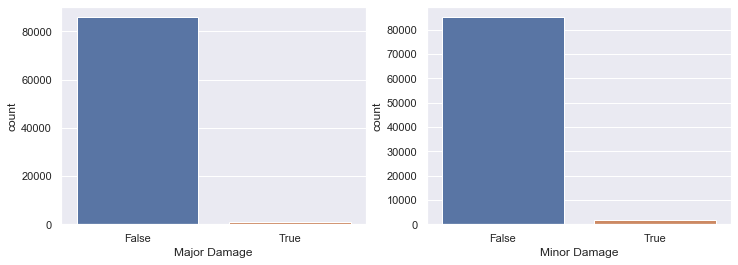

In [96]:
#plot the predicted number of major damage and number of minor damage
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.countplot(Predicted_test_major_frame['Major Damage'],ax=axes[0])
sb.countplot(Predicted_test_minor_frame['Minor Damage'], ax=axes[1])

In [97]:
value_minor = Predicted_test_minor_frame.sum()
value_major = Predicted_test_major_frame.sum()

print(value_minor)
print()
print(value_major)

Minor Damage    1814
dtype: int64

Major Damage    1018
dtype: int64
